<a href="https://colab.research.google.com/github/omar189/GP/blob/main/product_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing basic libraries and adding dataset**

In [ ]:
import os #import the os Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!pip install -U textblob # library to proccess textual data
!python -m textblob.download_corpora

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 341, in resolve
    name, crit = self._merge_into_c

In [ ]:
from textblob import TextBlob

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Please input your dataset**



In [ ]:
#upload dataset
from google.colab import files
uploaded = files.upload()

Saving twitter_trainingset.csv to twitter_trainingset.csv


# **loading dataset and preprocessing**

In [ ]:
#load dataset
DS_Tweets = pd.read_csv("twitter_trainingset.csv", encoding= 'unicode_escape')

In [ ]:
#Display the head of the DataSet
DS_Tweets.head()

,id,product,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
print(DS_Tweets)

         id      product sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                   tweet  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just 

In [ ]:
#data preprocessing
len(DS_Tweets), DS_Tweets.index.shape[-1]

(74682, 74682)

In [ ]:
#import nltk libraries
import nltk

nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
    "opinion_lexicon"
    
])


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [ ]:
#import preprocessing libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
#get shape of dataset
print("The Shape of the Dataset".format(),DS_Tweets.shape)

The Shape of the Dataset (74682, 4)


In [ ]:
# convert tweets to string format
DS = DS_Tweets[["tweet"]]
DS["tweet"] = DS["tweet"].astype(str)
DS_Tweets.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,product,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
#lower casing the tweets
DS["lower case tweet"]= DS["tweet"].str.lower()
DS.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tweet,lower case tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [ ]:
#removing punctuation
DS.drop(["lower case tweet"], axis=1, inplace=True)
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
  DS["tweet_wo_punct"] = DS["tweet"].apply(lambda text: remove_punctuation(text))
DS.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tweet
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...


In [ ]:
#removing stopwords
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
   
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

DS["tweet_wo_stop"] = DS["tweet"].apply(lambda text: remove_stopwords(text))
DS.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tweet,tweet_wo_stop
0,im getting on borderlands and i will murder yo...,"im getting borderlands murder ,"
1,I am coming to the borders and I will kill you...,"I coming borders I kill all,"
2,im getting on borderlands and i will kill you ...,"im getting borderlands kill all,"
3,im coming on borderlands and i will murder you...,"im coming borderlands murder all,"
4,im getting on borderlands 2 and i will murder ...,"im getting borderlands 2 murder all,"


In [ ]:
#getting most frequent words
from collections import Counter
cnt = Counter()
for text in DS["tweet_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('I', 25184),
 ('/', 14655),
 ('@', 11081),
 ('.', 10215),
 ('game', 5696),
 ('The', 5006),
 ('-', 4646),
 ('like', 4318),
 ('get', 3517),
 ('\x81EE\x80\x81EE', 3153)]

In [ ]:
#removing most frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

DS["tweet_wo_stopfreq"] = DS["tweet_wo_stop"].apply(lambda text: remove_freqwords(text))
DS.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tweet,tweet_wo_stop,tweet_wo_stopfreq
0,im getting on borderlands and i will murder yo...,"im getting borderlands murder ,","im getting borderlands murder ,"
1,I am coming to the borders and I will kill you...,"I coming borders I kill all,","coming borders kill all,"
2,im getting on borderlands and i will kill you ...,"im getting borderlands kill all,","im getting borderlands kill all,"
3,im coming on borderlands and i will murder you...,"im coming borderlands murder all,","im coming borderlands murder all,"
4,im getting on borderlands 2 and i will murder ...,"im getting borderlands 2 murder all,","im getting borderlands 2 murder all,"


In [ ]:
#removing exceptinaly rare words
DS.drop(["tweet_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

DS["tweet_wo_stopfreqrare"] = DS["tweet_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
DS.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tweet,tweet_wo_stopfreq,tweet_wo_stopfreqrare
0,im getting on borderlands and i will murder yo...,"im getting borderlands murder ,","im getting borderlands murder ,"
1,I am coming to the borders and I will kill you...,"coming borders kill all,","coming borders kill all,"
2,im getting on borderlands and i will kill you ...,"im getting borderlands kill all,","im getting borderlands kill all,"
3,im coming on borderlands and i will murder you...,"im coming borderlands murder all,","im coming borderlands murder all,"
4,im getting on borderlands 2 and i will murder ...,"im getting borderlands 2 murder all,","im getting borderlands 2 murder all,"


In [ ]:
#stemming (e.g walking = walk)
from nltk.stem.porter import PorterStemmer


DS.drop(["tweet_wo_stopfreq", "tweet_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

DS["tweet_stemmed"] = DS["tweet"].apply(lambda text: stem_words(text))
DS.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tweet,tweet_stemmed
0,im getting on borderlands and i will murder yo...,"im get on borderland and i will murder you all ,"
1,I am coming to the borders and I will kill you...,"I am come to the border and I will kill you all,"
2,im getting on borderlands and i will kill you ...,"im get on borderland and i will kill you all,"
3,im coming on borderlands and i will murder you...,"im come on borderland and i will murder you all,"
4,im getting on borderlands 2 and i will murder ...,im get on borderland 2 and i will murder you m...


# **Building classification system**

In [ ]:
#building text classification
#first train and test data
train = [
     ('I love this phone.', 'pos'),
     ('this is an amazing product!', 'pos'),
     ('I feel very good about these purchases.', 'pos'),
     ('this is my best purchasing decision.', 'pos'),
     ("what an awesome PC", 'pos'),
     ('I do not like this phone', 'neg'),
     ('I am tired of this stuff.', 'neg'),
     ("I can't deal with this", 'neg'),
     ('this laptopp is awful', 'neg'),
     ('my phone is a complete dissapoitmenet.', 'neg'),
     ('this screen is horrible' , 'neg')
]


test = [
        ('the phone was good.', 'pos'),
        ('I do not enjoy my new game', 'neg'),
        ("I ain't happy with this car today.", 'neg'),
        ("the car feels amazing", 'pos'),
        ('samsung is a favorite of mine.', 'pos'),
         ("I can't believe I bought this.", 'neg')

]

In [ ]:
#create naive bayes classifier
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

In [ ]:
#test classifying
cl.classify("this is an amazing phone!")

'pos'

In [ ]:
blob = TextBlob("The phone is ok. But the camera is horrible.", classifier=cl)
blob.classify()

'neg'

In [ ]:
for s in blob.sentences: 
 print(s)
 print(s.classify())

The phone is ok.
neg
But the camera is horrible.
neg


In [ ]:
#calculate accuracy 
cl.accuracy(test)

0.8333333333333334

In [ ]:
#display most informative features
cl.show_informative_features(5)  

Most Informative Features
          contains(this) = False             pos : neg    =      1.9 : 1.0
            contains(an) = False             neg : pos    =      1.6 : 1.0
         contains(phone) = True              neg : pos    =      1.4 : 1.0
          contains(this) = True              neg : pos    =      1.3 : 1.0
       contains(amazing) = False             neg : pos    =      1.2 : 1.0


In [ ]:
#adding new data and testing again
new_data= [
           ('this model is my favorite', 'pos'),
           ('this console is so overrated.', 'neg'),
           ('this new tv is fire', 'pos'),
           ('this phone is slower than my grandma', 'neg'),
           ('this vaccum is not bad', 'pos'),
]
cl.update(new_data)
cl.accuracy(test)

0.6666666666666666

In [ ]:
#feature extractor
def end_word_extractor(document):
 tokens = document.split()
 first_word, last_word = tokens[0], tokens[-1]
 feats = {}
 feats["first({0})".format(first_word)] = True
 feats["last({0})".format(last_word)] = False
 return feats
 features = end_word_extractor("this phone is good")
 assert features == {'last(good)': False, 'first(this)': True}


In [ ]:
cl2 = NaiveBayesClassifier(test, feature_extractor=end_word_extractor)
blob = TextBlob("I'm esctatic with my new glasses.", classifier=cl2)
blob.sentiment

Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)

In [ ]:
#testing polarity score for an example
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, the new samsung phone is really powerful!")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



{'compound': 0.8012, 'neg': 0.0, 'neu': 0.455, 'pos': 0.545}

# **building a dictionary**

In [ ]:
#installing ggplot package to help visualize the data
!pip install git+https://github.com/yhat/ggpy.git

  Cloning https://github.com/yhat/ggpy.git to /tmp/pip-req-build-5s76kus5
  Running command git clone -q https://github.com/yhat/ggpy.git /tmp/pip-req-build-5s76kus5
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 104, in resolve
    req, requested_extras=()
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/factory.py", line 434, in make_requirement_from_install_req
    version=None,
  File "/usr/local/li

In [ ]:
#import opinion lexicon dictionary from nltk library
from nltk.corpus import opinion_lexicon

In [ ]:
#create a list of postive and negative words
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

LookupError: ignored

In [ ]:
#construct a tokenizer to divide string into substrings
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()

# **create and apply sentiment function**

In [ ]:
#define a function that divides strings into substrings and then counts the positive and negative words before calculating sentiment
def sentiment(sentence):
  senti=0
  words = [word.lower() for word in tokenizer.tokenize(sentence)]
  for word in words:
    if word in pos_list:
      senti += 1
    elif word in neg_list:
      senti -= 1
  return senti

In [ ]:
#apply the sentiment fuction on the tweets
DS["sentiment"]=DS["tweet_stemmed"].apply(sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



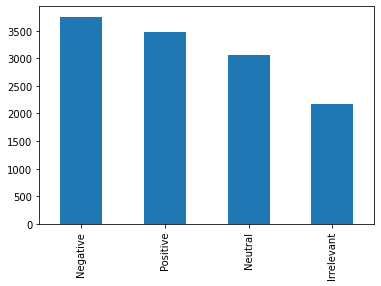

In [ ]:
#get a graph of the number of tweets based on sentiment score
filtered_data=DS_Tweets[['sentiment','id']].drop_duplicates()
filtered_data.sentiment.value_counts()[:4].plot(kind='bar')
plt.show()

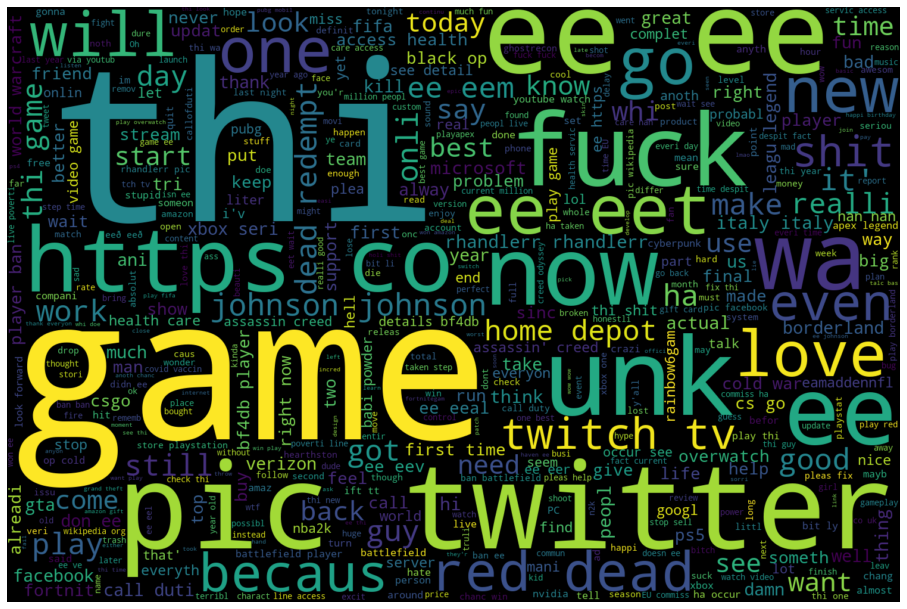

In [ ]:
#get word map of the most commonly used words in the dataset
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(DS["tweet_stemmed"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **train-test split and k nearest neighbor score**

In [ ]:
#import train-test split libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#test variables
X = DS["tweet_stemmed"]
y = DS["sentiment"]

In [ ]:
#split 30 percent of the dataset into a test set and a random state to make our results reproducuble
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state= 20)

In [ ]:
#count vectorizer to transform a the text into a vector on the basis of the frequency of each word.
from sklearn.feature_extraction.text import CountVectorizer
vt = CountVectorizer(analyzer="word")
X_train_count = vt.fit_transform(X_train)
X_test_count = vt.transform(X_test)

In [ ]:
print(X_train_count.toarray())
X_train_count

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<52277x27479 sparse matrix of type '<class 'numpy.int64'>'
	with 857438 stored elements in Compressed Sparse Row format>

In [ ]:
#K nearest neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_count, y_train)

KNeighborsClassifier()

In [ ]:
knn_score = knn.score(X_test_count, y_test)
print("Results for KNN Classifier with CountVectorizer")
print(knn_score)


Results for KNN Classifier with CountVectorizer
0.6387413523767016


# **GUI code**

In [2]:
pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/drive')

KeyboardInterrupt: ignored